# Bora usar algumas técnicas comuns de DSP: Filtros

<p>Uma das formas mais simples e seguras de se utilizar filtros em Python é utilizando a biblioteca SCIPY.</p>
<p>Por isso, demonstraremos aqui alguns tipos de filtros mais comuns sendo projetados e aplicados com essa bilbioteca.</p>

### 1. Imports

In [1]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### 2. Gerando um áudio simples para fazermos nossos testes

In [2]:
class CommonwaveformsGenerator:
    def __init__(self):
        pass
    
    def generate_square_wave(self, frequency, samples, sample_rate):
        sine_wave = self.generate_sine_wave(frequency, samples, sample_rate)
        square_wave = np.where(sine_wave > 0, 1, -1)
        return square_wave
    
    def generate_sine_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        sine_wave = np.sin(2 * np.pi * frequency * (time / sample_rate))
        return sine_wave
    
    def generate_triangle_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=0.5)
    
    def generate_sawtooth_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=1)
 

In [18]:
sample_rate = 44100
frequency = 1000
duration = 1
n_samples = duration * sample_rate

generator = CommonwaveformsGenerator()

In [19]:
sine_wave = generator.generate_sine_wave(frequency, n_samples, sample_rate)
square_wave = generator.generate_square_wave(frequency, n_samples, sample_rate)
triangle_wave = generator.generate_triangle_wave(frequency, n_samples, sample_rate)
sawtooth_wave = generator.generate_sawtooth_wave(frequency, n_samples, sample_rate)

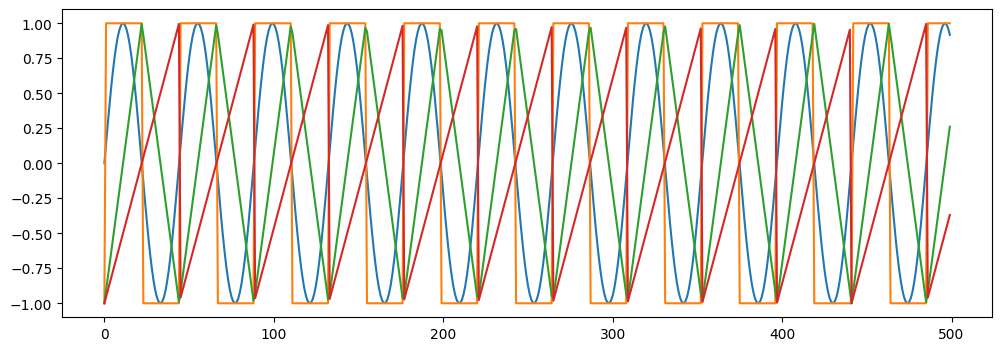

In [110]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(sine_wave[0:500])
ax.plot(square_wave[0:500])
ax.plot(triangle_wave[0:500])
ax.plot(sawtooth_wave[0:500])


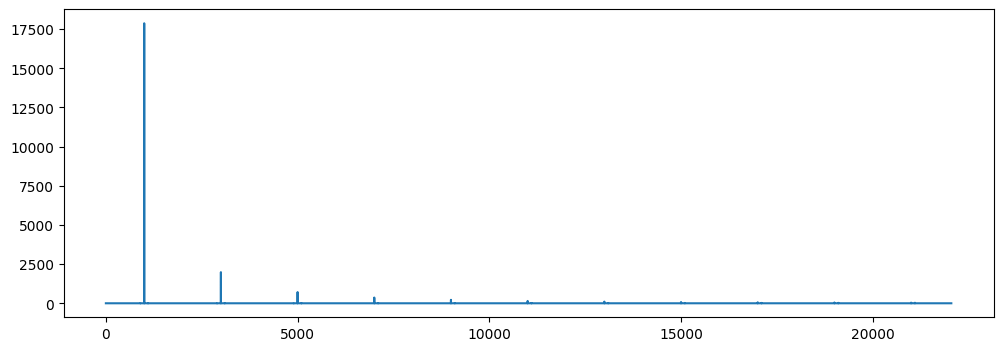

In [21]:
magnitude_spectrum = np.abs(np.fft.fft(triangle_wave))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]

bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(bin_frequencies, magnitude_spectrum)

### 3. Projetando alguns filtros simples com Scipy

#### 3.1. Lowpass

In [30]:
order = 1
nyquist_frequency = sample_rate / 2
cutoff_frequency = 8 * frequency 
b, a = scipy.signal.butter(order, cutoff_frequency / nyquist_frequency, 'lowpass')
filtered_signal = scipy.signal.filtfilt(b, a, square_wave)

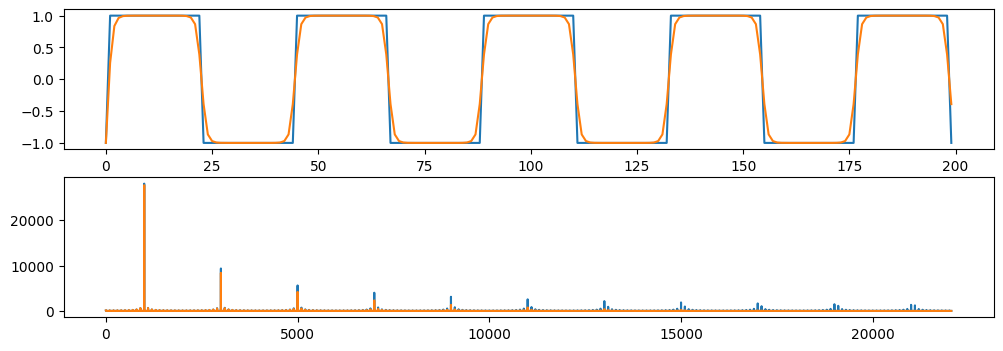

In [36]:

fig, ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(square_wave[0:200])
ax[0].plot(filtered_signal[0:200])

magnitude_spectrum = np.abs(np.fft.fft(square_wave))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)

magnitude_spectrum = np.abs(np.fft.fft(filtered_signal))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)


#### 3.2. Highpass

In [37]:
order = 1
nyquist_frequency = sample_rate / 2
cutoff_frequency = 2 * frequency 
b, a = scipy.signal.butter(order, cutoff_frequency / nyquist_frequency, 'highpass')
filtered_signal = scipy.signal.filtfilt(b, a, square_wave)

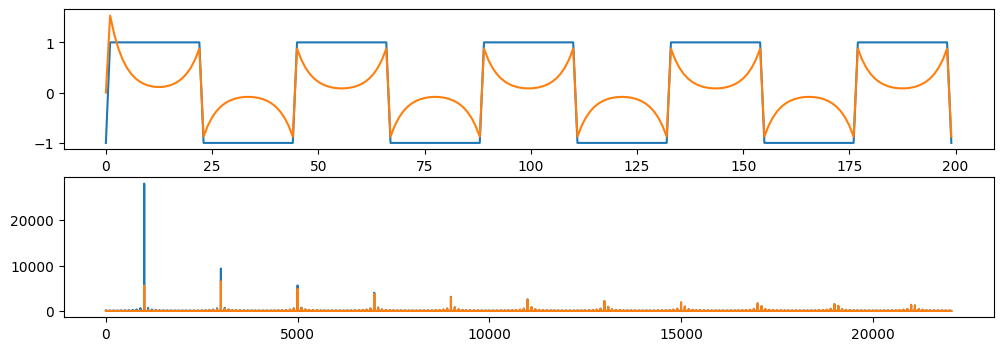

In [38]:

fig, ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(square_wave[0:200])
ax[0].plot(filtered_signal[0:200])

magnitude_spectrum = np.abs(np.fft.fft(square_wave))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)

magnitude_spectrum = np.abs(np.fft.fft(filtered_signal))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)


#### 3.3. Bandpass

In [39]:
order = 1
nyquist_frequency = sample_rate / 2
low_cutoff_frequency = 2 * frequency 
high_cutoff_frequency = 8 * frequency
b, a = scipy.signal.butter(order, [low_cutoff_frequency / nyquist_frequency, high_cutoff_frequency / nyquist_frequency], 'band')
filtered_signal = scipy.signal.filtfilt(b, a, square_wave)

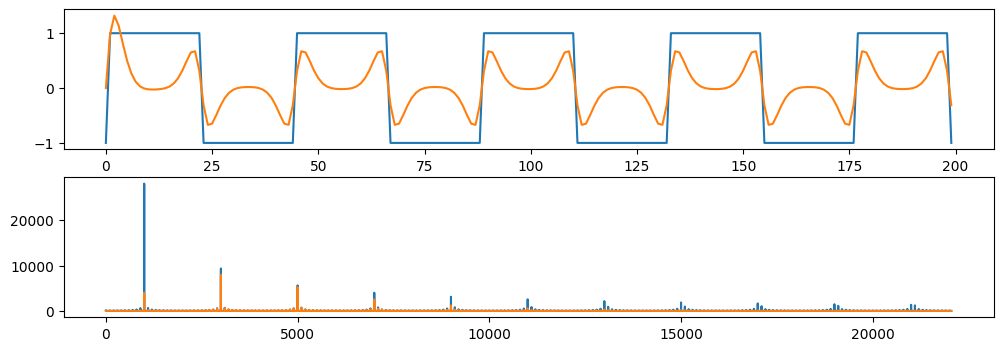

In [40]:

fig, ax = plt.subplots(2, 1, figsize=(12, 4))

ax[0].plot(square_wave[0:200])
ax[0].plot(filtered_signal[0:200])

magnitude_spectrum = np.abs(np.fft.fft(square_wave))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)

magnitude_spectrum = np.abs(np.fft.fft(filtered_signal))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]
bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

ax[1].plot(bin_frequencies, magnitude_spectrum)
